In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_excel("data/resultsmaxKMmixed.XLSX",header=None)
X_train=data.iloc[:,:-2].values
Y_val = data.iloc[:, -2].values.reshape(-1, 1)
Y_depth = data.iloc[:, -1].values.reshape(-1, 1)

data=pd.read_excel("data/_testresultsmaxKMmixed.XLSX",header=None)
X_test=data.iloc[:,:-2].values
Y_test_val = data.iloc[:, -2].values.reshape(-1, 1)
Y_test_depth = data.iloc[:, -1].values.reshape(-1, 1)


In [121]:
'''
X_train1, X_test1, Y_val, Y_test_val = train_test_split(X, Yval, test_size=.3, random_state=41)
X_train2, X_test2, Y_depth, Y_test_depth = train_test_split(X, Ydepth, test_size=.3, random_state=41)

'''

In [114]:
'''
random_indices=np.random.permutation(len(X))
training_size=int(len(X)*0.7)
X_train2=X[random_indices[:training_size]]
X_test2=X[random_indices[training_size:]]
Y_depth=Ydepth[:training_size]
Y_test_depth=Ydepth[training_size:]
'''

'\nrandom_indices=np.random.permutation(len(X))\ntraining_size=int(len(X)*0.7)\nX_train2=X[random_indices[:training_size]]\nX_test2=X[random_indices[training_size:]]\nY_depth=Ydepth[:training_size]\nY_test_depth=Ydepth[training_size:]\n'

In [3]:
data.columns=['friction_velocity','hbl','max_value of diffusivity','depth at Max_diffusivity']

data.head(20)


,friction_velocity,hbl,max_value of diffusivity,depth at Max_diffusivity
0,11.5,-0.000452,0.063658,-4
1,11.5,-0.000421,0.061437,-4
2,10.5,-0.000374,0.053188,-4
3,10.5,-0.000312,0.048582,-4
4,9.5,-0.000237,0.038013,-4
5,8.5,-0.000118,0.023934,-3
6,7.5,-0.000053,0.014321,-3
7,6.5,-0.000032,0.009497,-3
8,6.5,-0.000011,0.005582,-3
9,5.5,-0.000004,0.003396,0


In [5]:
forest1=RandomForestRegressor(n_estimators=4000, criterion='squared_error',max_depth=100,min_samples_split=2,min_samples_leaf=1)
forest2=RandomForestRegressor(n_estimators=4000, criterion='squared_error',max_depth=100,min_samples_split=2, min_samples_leaf=1)

forest1.fit(X_train,Y_val.ravel())
forest2.fit(X_train,Y_depth.ravel())







RandomForestRegressor(max_depth=100, n_estimators=4000)

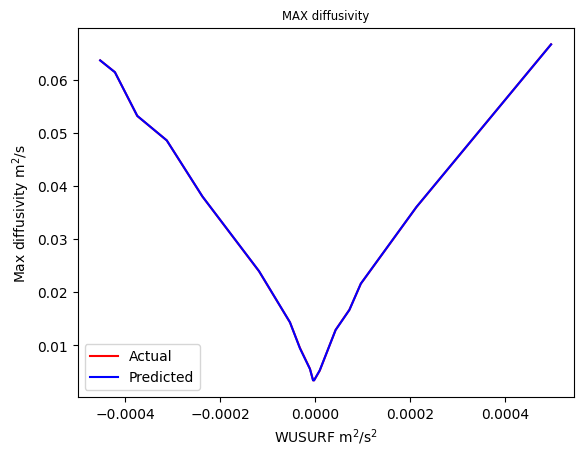

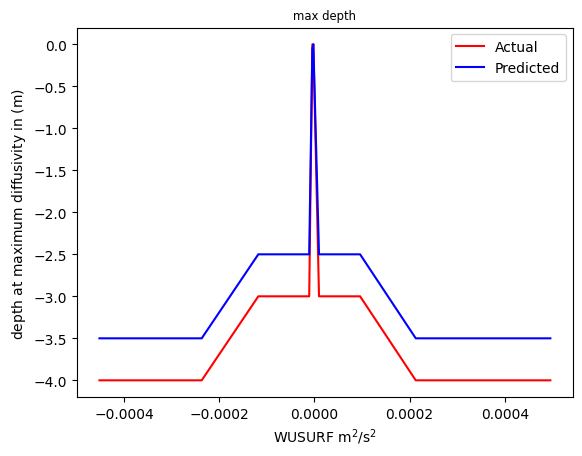

In [8]:

plt.figure(1)
plt.plot(sorted(X_test[:, 1]), Y_test_val[np.argsort(X_test[:, 1])], color='red', label='Actual')
plt.plot(sorted(X_test[:, 1]), forest1.predict(X_test)[np.argsort(X_test[:, 1])], color='blue',
         label='Predicted')

plt.legend()
plt.xlabel('WUSURF $\mathregular{m^{2}/s^{2}}$')
plt.ylabel('Max diffusivity $\mathregular{m^{2}/s}$ ')
plt.title('MAX diffusivity', fontsize='small')
plt.savefig(save_results+'MAX diffusivity.png')
plt.show()

plt.figure(2)
plt.plot(sorted(X_test[:, 1]), Y_test_depth[np.argsort(X_test[:, 1])], color='red', label='Actual')
plt.plot(sorted(X_test[:,1]), forest2.predict(X_test)[np.argsort(X_test[:, 1])], color='blue',
         label='Predicted')

plt.legend()
plt.xlabel('WUSURF $\mathregular{m^{2}/s^{2}}$')
plt.ylabel('depth at maximum diffusivity in ($\mathregular{m}$) ')
plt.title('max depth', fontsize='small')
plt.show()

predictions_value=forest1.predict(X_test)
predictions_depth=forest2.predict(X_test)

In [288]:
diffusion_val_error=mean_squared_error(Y_test_val, predictions_value)
depth_error=mean_squared_error(Y_test_depth, predictions_depth)
print('diffusion_val_error',diffusion_val_error)
print('depth_error',depth_error)

diffusion_val_error 6.061082059777431e-08
depth_error 0.5804291213235294


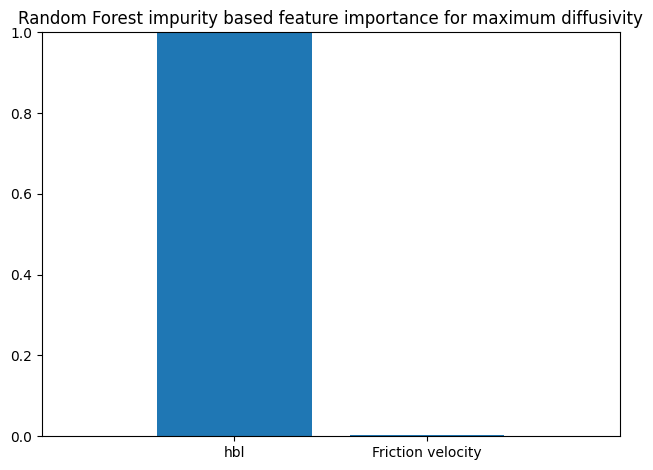

In [280]:
# Feature importance for MAX diffusivity


important_feature_val=forest1.feature_importances_


indices_val=np.argsort(important_feature_val)[::-1]


plt.figure()
plt.title("Random Forest impurity based feature importance for maximum diffusivity")
feature_names = np.array((['hbl']+['Friction velocity']))
plt.bar(range(X_train.shape[1]),important_feature_val[indices_val])
plt.xticks(range(X_train.shape[1]),feature_names[indices_val])
plt.xlim([-1,X_train.shape[1]])
plt.ylim([0,1])

plt.tight_layout()
plt.show()


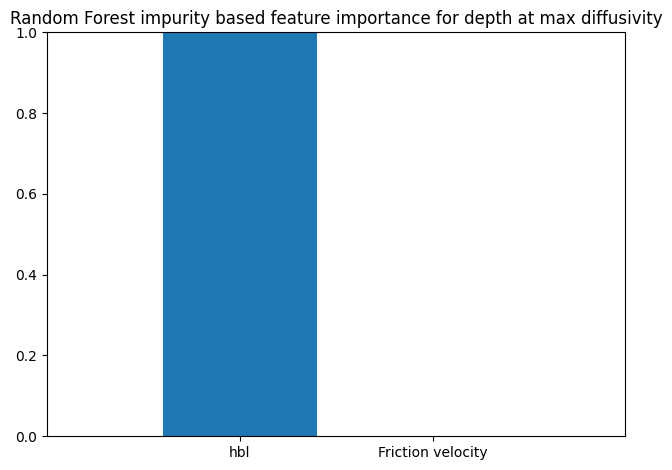

In [281]:

important_feature_depth=forest2.feature_importances_
indices_depth=np.argsort(important_feature_depth)[::-1]

plt.figure()
plt.title("Random Forest impurity based feature importance for depth at max diffusivity")
plt.bar(range(X_train.shape[1]),important_feature_depth[indices_depth])
feature_names = np.array((['hbl']+['Friction velocity']))
plt.xticks(range(X_train.shape[1]),feature_names[indices_depth])
plt.xlim([-1,X_train2.shape[1]])
plt.ylim([0,1])

plt.tight_layout()

plt.show()

In [266]:
print(important_feature_val)
print(important_feature_depth)

[0.98579061 0.01420939]
[0.974399 0.025601]


In [283]:
np.random.seed(123)
x1 = np.random.randn(X_train.shape[0]).reshape(-1, 1)
x2 = np.random.randn(X_test.shape[0]).reshape(-1, 1)
X_train_r = np.hstack((x1,X_train))
X_test_r = np.hstack((x2,X_test))
X_test_r.shape

np.random.seed(123)
x11 = np.random.randn(X_train.shape[0]).reshape(-1, 1)
x22 = np.random.randn(X_test.shape[0]).reshape(-1, 1)
X_train_r1 = np.hstack((x11,X_train))
X_test_r1 = np.hstack((x22,X_test))
X_test_r1.shape

(17, 3)

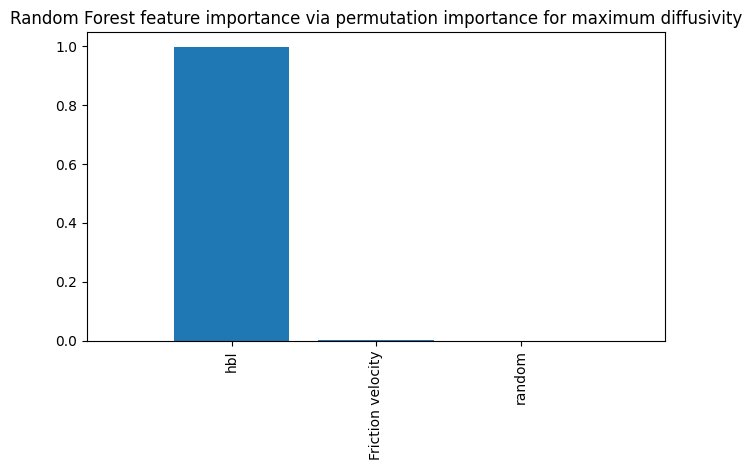

array([9.98117970e-01, 1.88202716e-03, 2.36814992e-09])

In [284]:

forest111 = RandomForestRegressor(n_estimators=100,
                                random_state=0)

forest111.fit(X_train_r, Y_val.ravel())

result = permutation_importance(
    estimator=forest111,
    X=X_test_r,
    y=Y_test_val,
    scoring='neg_mean_squared_error',
    n_repeats=50,
    random_state=0
)

indices = np.argsort(result['importances_mean'])[::-1]

plt.figure()
plt.title("Random Forest feature importance via permutation importance for maximum diffusivity")
plt.bar(
    range(X_train_r.shape[1]),
    result['importances_mean'][indices]/sum(result['importances_mean'][indices]),
    #yerr=result['importances_std'][indices]
)

feature_names = np.array((['random'] + ['hbl']+['Friction velocity']))
plt.xticks(range(X_train_r.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_r.shape[1]])
#plt.ylim([0, 0.2])

plt.tight_layout()

plt.show()
result['importances_mean'][indices]/sum(result['importances_mean'][indices])

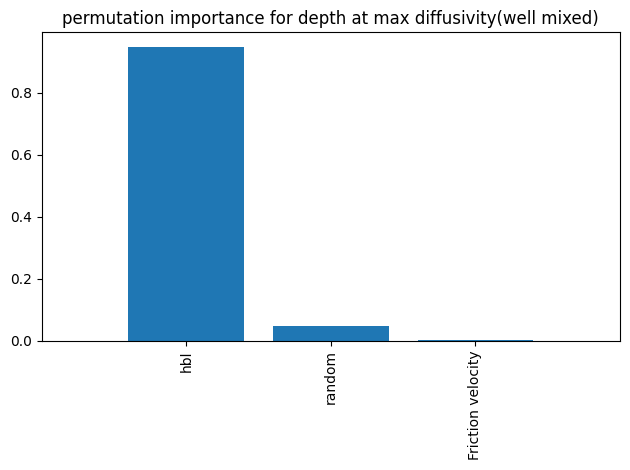

array([0.94846423, 0.0484902 , 0.00304557])

In [271]:

forest222 = RandomForestRegressor(n_estimators=100,
                                random_state=0)

forest222.fit(X_train_r1, Y_depth.ravel())

result = permutation_importance(
    estimator=forest222,
    X=X_test_r1,
    y=Y_test_depth,
    scoring='neg_mean_squared_error',
    n_repeats=50,
    random_state=0
)

indices = np.argsort(result['importances_mean'])[::-1]

plt.figure()
plt.title("permutation importance for depth at max diffusivity(well mixed)")
plt.bar(
    range(X_train_r1.shape[1]),
    result['importances_mean'][indices]/sum(result['importances_mean'][indices]),
    #yerr=result['importances_std'][indices]/sum(result['importances_mean'][indices])
)

feature_names = np.array((['random'] + ['hbl']+['Friction velocity']))
plt.xticks(range(X_train_r1.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_r1.shape[1]])
#plt.ylim([0, 0.2])

plt.tight_layout()
plt.show()
result['importances_mean'][indices]/sum(result['importances_mean'][indices])

In [272]:
# permutation feature importance
result = permutation_importance(
    estimator=forest1,
    X=X_test,
    y=Y_test_val,
    scoring='neg_mean_squared_error',
    n_repeats=50,
    random_state=42
)
indices = np.argsort(result['importances_mean'])[::-1]

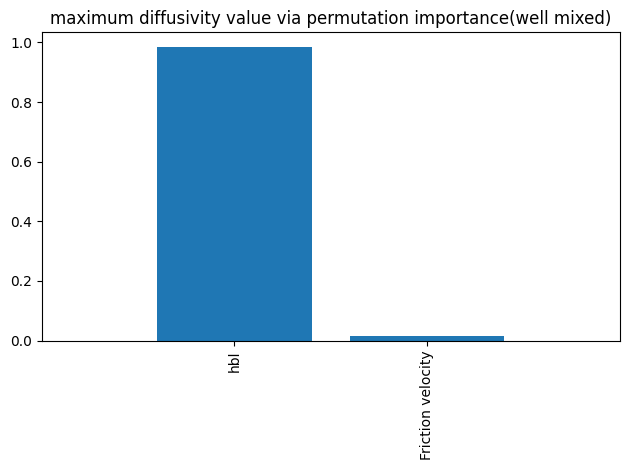

[0.98445516 0.01554484]


In [273]:
plt.figure()
plt.title("maximum diffusivity value via permutation importance(well mixed)")
plt.bar(
    range(X.shape[1]),
    result['importances_mean'][indices]/sum(result['importances_mean'][indices]),
    #yerr=result['importances_std'][indices]
)

feature_names = np.array((['hbl']+['Friction velocity']))
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
#plt.ylim([0, 0.17])

plt.tight_layout()
plt.savefig(save_results+'value_via_permutaion feature(well mixed).png')
plt.show()
print(result['importances_mean'][indices]/sum(result['importances_mean'][indices]))

In [154]:
result

{'importances_mean': array([8.82938863e-05, 2.84833012e-03]),
 'importances_std': array([5.03246576e-06, 2.12357197e-04]),
 'importances': array([[8.62771380e-05, 8.47147862e-05, 9.46602508e-05, 9.30337802e-05,
         8.08795657e-05, 9.04708171e-05, 8.45514554e-05, 8.76440921e-05,
         9.23133712e-05, 8.74340663e-05, 9.08942232e-05, 8.47685633e-05,
         8.71663428e-05, 8.92693187e-05, 9.08570180e-05, 8.89656809e-05,
         9.24697457e-05, 9.01600039e-05, 9.20478221e-05, 8.99531435e-05,
         8.38476740e-05, 8.87407958e-05, 8.77935816e-05, 7.85623164e-05,
         9.71471373e-05, 7.95466365e-05, 8.39300471e-05, 9.37959459e-05,
         9.71500175e-05, 8.37215394e-05, 7.67983325e-05, 9.67289009e-05,
         9.52924838e-05, 8.50263807e-05, 9.66791535e-05, 8.38986705e-05,
         9.16040091e-05, 8.95808162e-05, 7.71438208e-05, 9.11583911e-05,
         8.53555785e-05, 8.62666070e-05, 8.91718179e-05, 8.82972319e-05,
         8.58875534e-05, 9.03130359e-05, 9.06360666e-05, 8.

In [274]:
result = permutation_importance(
    estimator=forest2,
    X=X_test,
    y=Y_test_depth,
    scoring='neg_mean_squared_error',
    n_repeats=50,
    random_state=0
)
indices = np.argsort(result['importances_mean'])[::-1]

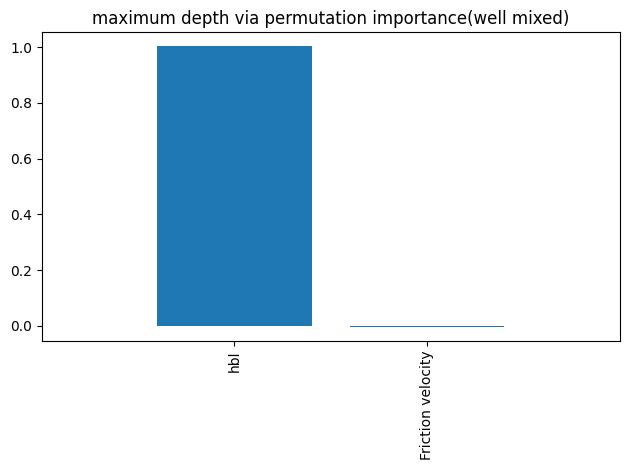

[ 1.0026523 -0.0026523]


In [275]:

plt.figure()
plt.title("maximum depth via permutation importance(well mixed)")
plt.bar(
    range(X.shape[1]),
    result['importances_mean'][indices]/sum(result['importances_mean'][indices]),
    #yerr=result['importances_std'][indices]
)
feature_names = np.array((['hbl']+['Friction velocity']))
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
#plt.ylim([0, 2.9])

plt.tight_layout()
plt.show()

print(result['importances_mean'][indices]/sum(result['importances_mean'][indices]))

In [22]:
result

{'importances_mean': array([-1.24182247e-02,  3.04464251e+01]),
 'importances_std': array([0.00690079, 2.03680335]),
 'importances': array([[-1.13860590e-02, -2.90617563e-03, -1.96792844e-02,
         -1.39074777e-02, -1.48357108e-02, -2.10597894e-02,
         -1.47902392e-02, -4.04393333e-04, -4.87993833e-03,
         -2.41433000e-03, -1.22054225e-02, -1.29941206e-02,
         -9.07331729e-03, -1.89467881e-02, -2.42544633e-02,
         -1.12448494e-02, -5.84268167e-03, -1.35703944e-02,
         -1.08033042e-02, -2.36683635e-02, -1.12592619e-02,
         -2.46878652e-02, -1.36150802e-02, -1.96932277e-02,
          2.97028104e-03, -2.36434819e-02,  3.42334375e-04,
         -1.08569108e-02, -1.87525569e-02, -9.50282500e-03,
         -9.14030667e-03, -1.82894492e-02, -1.11257733e-02,
          7.80106042e-04, -1.26004427e-02, -5.54413646e-03,
         -9.89486750e-03, -1.92940313e-03, -8.20695250e-03,
         -1.58052092e-02, -2.10690269e-02, -1.56851250e-02,
         -1.04147173e-02, -1

In [140]:
y_pred_baseline_diffvalue = forest1.predict(X_test1)
baseline_score1 = mean_squared_error(Y_test_val, y_pred_baseline_diffvalue)

y_pred_baseline_depth = forest2.predict(X_test2)
baseline_score2 = mean_squared_error(Y_test_depth, y_pred_baseline_depth)

In [141]:


feature_importances_manual_val = []
for feature in range(X_train1.shape[1]):
    X_permuted_val = X_train1.copy()
    np.random.shuffle(X_permuted_val[:, feature])
    y_pred_permuted_diffvalue = forest1.predict(X_permuted_val)
    permuted_score_val = mean_squared_error(Y_val, y_pred_permuted_diffvalue)
    feature_importance = baseline_score1 - permuted_score_val
    feature_importances_manual_val.append(feature_importance)

feature_importances_manual_depth = []
for feature in range(X_train2.shape[1]):
    X_permuted_depth =  X_train2.copy()
    np.random.shuffle(X_permuted_depth[:, feature])
    y_pred_permuted_depth = forest2.predict(X_permuted_depth)
    permuted_score_depth = mean_squared_error(Y_depth, y_pred_permuted_depth)
    feature_importance = baseline_score2 - permuted_score_depth
    feature_importances_manual_depth.append(feature_importance)
print(feature_importances_manual_val)
print(feature_importances_manual_depth)


[-9.331566049767439e-05, -0.0028697433581979354]
[-0.058648282559523805, -2.5963218539880955]


In [142]:
feature_importances_manual_val

[-9.331566049767439e-05, -0.0028697433581979354]